In [30]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import zipfile
from tqdm.notebook import tqdm

In [2]:
datasetPath = "./drive/MyDrive/Colab Notebooks/Capstone Project/Facial Expression Dataset Filtered 2.zip"
#datasetPath = "./mma-facial-expression.zip"
with zipfile.ZipFile(datasetPath) as file :
    file.extractall()

In [3]:
"""
disgust : 3231
happy : 28592
surprise : 8113
neutral : 29384
sad : 12223
angry : 6566
fear : 4859
"""

for i in os.listdir("./Facial Expression Dataset Filtered 2/train") :
    print(i, ":", len(os.listdir("./Facial Expression Dataset Filtered 2/train/" + i)))

fear : 3997
happy : 21988
angry : 4112
neutral : 14291
surprise : 4486
disgust : 405
sad : 7059


In [4]:
def prepareImage(path):
    #img = tf.keras.preprocessing.image.load_img(file, target_size=(224, 224))
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (48, 48))
    #img = tf.keras.preprocessing.image.img_to_array(img)
    return img
    #img = np.expand_dims(img, axis=0)
    #return tf.keras.applications.mobilenet.preprocess_input(img)

In [6]:
trainDir = "./Facial Expression Dataset Filtered 2/train/"
#trainDir = "./MMAFEDB/train/"
expression = ["angry", "happy", "neutral", "sad"]

imgTrain = []
labelTrain = []

numOfData = 4000
for label, labelName in enumerate(expression) :
    for i in tqdm(os.listdir(trainDir + labelName)[:numOfData]) :
        imgTrain.append(prepareImage(os.path.join(trainDir, labelName, i)))
        tempLabel = np.zeros(len(expression))
        tempLabel[label] = 1
        labelTrain.append(tempLabel)
        #labelTrain.append(label)
        #imgTrain = np.concatenate((imgTrain, prepareImage(trainDir + i + "/" + j)))

imgTrain = np.array(imgTrain)
labelTrain = np.array(labelTrain)

index = np.arange(len(expression) * numOfData)
np.random.seed(1)
np.random.shuffle(index)

imgTrain = imgTrain[index]
labelTrain = labelTrain[index]

In [ ]:
for i in labelTrain[:100] :
    print(i)

In [7]:
baseModel = tf.keras.applications.MobileNetV2(include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(baseModel.output)
dense1 = tf.keras.layers.Dense(100, activation="relu")(avg)
dense2 = tf.keras.layers.Dense(100, activation="relu")(dense1)
output = tf.keras.layers.Dense(len(expression), activation="softmax")(dense2)
model = tf.keras.models.Model(inputs=baseModel.input, outputs=output)

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

for i in baseModel.layers :
    i.trainable = True

#model.summary()

9412608/9406464 [==============================] - 0s 0us/step


In [8]:
history = model.fit(imgTrain, labelTrain, epochs=50, validation_split=0.1)

Epoch 1/50
450/450 [==============================] - 47s 23ms/step - loss: 1.3558 - accuracy: 0.3770 - val_loss: 2.9269 - val_accuracy: 0.2925
Epoch 2/50
450/450 [==============================] - 10s 22ms/step - loss: 1.0618 - accuracy: 0.5469 - val_loss: 1.8707 - val_accuracy: 0.4419
Epoch 3/50
450/450 [==============================] - 10s 22ms/step - loss: 0.8949 - accuracy: 0.6313 - val_loss: 1.8747 - val_accuracy: 0.4969
Epoch 4/50
450/450 [==============================] - 10s 22ms/step - loss: 0.8799 - accuracy: 0.6441 - val_loss: 3.5418 - val_accuracy: 0.4294
Epoch 5/50
450/450 [==============================] - 10s 22ms/step - loss: 0.8627 - accuracy: 0.6558 - val_loss: 1.9118 - val_accuracy: 0.5038
Epoch 6/50
450/450 [==============================] - 10s 22ms/step - loss: 0.7783 - accuracy: 0.6836 - val_loss: 1.2014 - val_accuracy: 0.5400
Epoch 7/50
450/450 [==============================] - 10s 22ms/step - loss: 0.8171 - accuracy: 0.6729 - val_loss: 1.2761 - val_accuracy:

(1, 48, 48, 3)


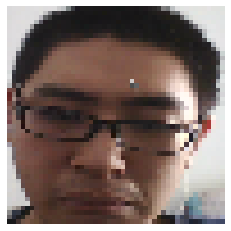

[[4.6289721e-04 2.7799842e-04 9.9924469e-01 1.4386067e-05]] 
 neutral


In [26]:
#img = cv2.imread("./angry999.png")
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = cv2.resize(img, (48, 48))
img = prepareImage("./drive/MyDrive/Colab Notebooks/Capstone Project/Test Photo/sad9002.png")
img = np.expand_dims(img, axis=0)
print(img.shape)

plt.imshow(img[0])
plt.axis("off")
plt.show()

prediction = model.predict(img)
print(prediction, "\n", expression[np.argmax(prediction)])

In [27]:
#testDir = "./Facial Expression Dataset/test/"
testDir = "./Facial Expression Dataset Filtered 2/test/"
#expression = ["angry", "happy", "neutral", "sad"]
#expression = ["angry", "happy"]

imgTest = []
labelTest = []

numOfData = 500
for label, labelName in enumerate(expression) :
    for i in tqdm(os.listdir(testDir + labelName)[:numOfData]) :
        imgTest.append(prepareImage(os.path.join(testDir, labelName, i)))
        tempLabel = np.zeros(len(expression))
        tempLabel[label] = 1
        labelTest.append(tempLabel)
        #labelTrain.append(label)
        #imgTrain = np.concatenate((imgTrain, prepareImage(trainDir + i + "/" + j)))

imgTest = np.array(imgTest)
labelTest = np.array(labelTest)

prediction = model.predict(imgTest)
cm = confusion_matrix(np.argmax(labelTest, axis=1), np.argmax(prediction, axis=1))
#for i in prediction :
#    print(np.argmax(i))

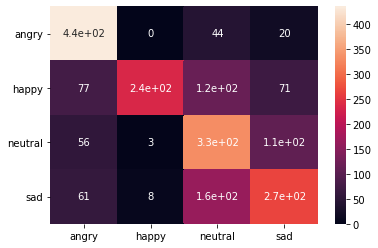

In [38]:
sns.heatmap(cm, annot=True, xticklabels=expression, yticklabels=expression)
plt.yticks(rotation=0)
plt.show()

Label : happy    Prediction : happy


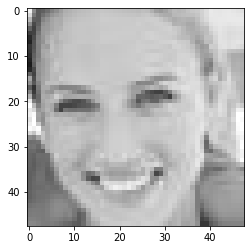

In [58]:
index = 508
print("Label :", expression[np.argmax(labelTest[index])], "   Prediction :", expression[np.argmax(prediction[index])])
plt.imshow(imgTest[index])
plt.show()

In [59]:
model.save("./model happy angry neutral sad very good")

INFO:tensorflow:Assets written to: ./model happy angry neutral sad very good/assets


In [60]:
! zip -rq "model happy angry neutral sad very good.zip" "model happy angry neutral sad very good"